# Statistical-Methods Homework8: Multicollinearity-PCR （主成分回归）

**Principal Component Regression**


## 背景描述

数据集来源：Longley's(1967)

我们构造了 16 个观测的 6 个自变量，具体请见下表：



## 数据描述
|    变量名    |                变量含义                |      变量类型       |  变量取值范围  |
| :----------: | :------------------------------------: | :-----------------: | :------------: |
| （自变量）X1 | 国民生产总值隐含价格平减指数(1954=100) | continuous variable | $\mathbb{R}^+$ |
| （自变量）X2 |              国民生产总值              | continuous variable | $\mathbb{R}^+$ |
| （自变量）X3 |                失业人数                | continuous variable | $\mathbb{R}^+$ |
| （自变量）X4 |             武装力量的规模             | continuous variable | $\mathbb{R}^+$ |
| （自变量）X5 |        14 岁及以上的非机构人口         | continuous variable | $\mathbb{R}^+$ |
| （自变量）X6 |              时间（年份）              | continuous variable | $\mathbb{R}^+$ |
| （因变量）Y  |               总就业人数               | continuous variable | $\mathbb{R}^+$ |

## 问题 
注：这里使用 $\alpha=0.05$ 的显著性水平

1. 判断所给数据是否具有多重共线性.
2. 若具有多重共线性, 选择适当的主成分.
3. 对降维后的数据进行回归分析.

In [1]:
# Import standard packages
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math

本次实验中我们直接调用sklearn包中的PCA模组进行主成分分析

In [2]:
# add stats libs
from itertools import combinations
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA  

In [56]:
alpha = 0.05
p = 6
n = 16

In [57]:
x = pd.read_csv('Project8.csv')
x.insert(0, 'intercept', np.ones(len(x))) 
data = x.values * 1.0
df = pd.DataFrame(data)
print(df.head(10))

     0       1         2       3       4         5       6        7
0  1.0   830.0  234289.0  2356.0  1590.0  107608.0  1947.0  60323.0
1  1.0   885.0  259426.0  2325.0  1456.0  108632.0  1948.0  61122.0
2  1.0   882.0  258054.0  3682.0  1616.0  109773.0  1949.0  60171.0
3  1.0   895.0  284599.0  3351.0  1650.0  110929.0  1950.0  61187.0
4  1.0   962.0  328975.0  2099.0  3099.0  112075.0  1951.0  63221.0
5  1.0   981.0  346999.0  1932.0  3594.0  113270.0  1952.0  63639.0
6  1.0   990.0  365385.0  1870.0  3547.0  115094.0  1953.0  64989.0
7  1.0  1000.0  363112.0  3578.0  3350.0  116219.0  1954.0  63761.0
8  1.0  1012.0  397469.0  2904.0  3048.0  117388.0  1955.0  66019.0
9  1.0  1046.0  419180.0  2822.0  2857.0  118734.0  1956.0  67857.0


In [58]:
# 对数据进行分割
X = data[:,0:p+1]
Y = data[:,-1]

对原始数据进行多元线性回归

In [47]:
# OLS（endog,exog=None,missing='none',hasconst=None) (endog:因变量，exog=自变量）
model = sm.OLS(Y, X).fit()
beta = model.params
model.summary()

/Users/sunqiushi/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     330.3
Date:                Tue, 20 Apr 2021   Prob (F-statistic):           4.98e-10
Time:                        19:20:23   Log-Likelihood:                -109.62
No. Observations:                  16   AIC:                             233.2
Df Residuals:                       9   BIC:                             238.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.482e+06    8.9e+05     -3.911      0.004    -5.5e+06   -1.47e+06
x1             1.5062      8.491      0.177      0.863     -17.703      20.715
x2            -0.0358      0.033     -1.070      0.313      -0.112       0.040
x3            -2.0202      0.488     -4.136      0.003      -3.125      -0.915
x4            -1.0332      0.214     -4.822      0.001      -1.518      -0.549
x5            -0.0511      0.226     -0.226      0.826      -0.563       0.460
x6          1829.1515    455.478      4.016      0.003     798.788    2859.515
==============================================================================
Omnibus:                        0.749   Durbin-Watson:                   2.559
Prob(Omnibus):                  0.688   Jarque-Bera (JB):                0.684
Skew:                           0.420   Prob(JB):                        0.710
Kurtosis:                       2.434   Cond. No.                     4.86e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.86e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**数据预处理：**

先对数据进行标准化处理

In [48]:
# 自变量 X 的均值
X_mean = []
for i in range(p):
    X_mean.append(np.mean(X[:, i+1])) 

# 自变量 X 的标准差
X_L = []
for i in range(p):
    X_L.append(sum((X[:, i+1] - X_mean[i]) ** 2))  

# 对自变量 X 标准化，截距不用标准化
X_std = X * 1.0
X_std[:,1:p+1] = (X[:,1:p+1] - X_mean) / np.sqrt(X_L)

# 对因变量 Y 标准化
Y_std = (Y - np.mean(Y)) / np.sqrt(sum((Y - np.mean(Y))**2))

df_std = pd.DataFrame(X_std)
df_std['Y'] = Y_std
print(df_std.head())

     0         1         2         3         4         5         6         Y
0  1.0 -0.446968 -0.398513 -0.231355 -0.377210 -0.364354 -0.406745 -0.367157
1  1.0 -0.315375 -0.333214 -0.239921 -0.426926 -0.326344 -0.352512 -0.308415
2  1.0 -0.322553 -0.336778  0.135028 -0.367563 -0.283992 -0.298279 -0.378332
3  1.0 -0.291449 -0.267822  0.043570 -0.354949 -0.241084 -0.244047 -0.303636
4  1.0 -0.131144 -0.152546 -0.302366  0.182657 -0.198546 -0.189814 -0.154097


**做多元线性回归分析:**

In [49]:
# Do the multiple linear regression——对标准化后的数据
model_std = sm.OLS(Y_std, X_std).fit()
beta_std = model_std.params
model_std.summary()

/Users/sunqiushi/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     330.3
Date:                Tue, 20 Apr 2021   Prob (F-statistic):           4.98e-10
Time:                        19:21:51   Log-Likelihood:                 42.670
No. Observations:                  16   AIC:                            -71.34
Df Residuals:                       9   BIC:                            -65.93
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.388e-17      0.006  -2.48e-15      1.000      -0.013       0.013
x1             0.0463      0.261      0.177      0.863      -0.544       0.637
x2            -1.0137      0.948     -1.070      0.313      -3.158       1.130
x3            -0.5375      0.130     -4.136      0.003      -0.832      -0.244
x4            -0.2047      0.042     -4.822      0.001      -0.301      -0.109
x5            -0.1012      0.448     -0.226      0.826      -1.114       0.912
x6             2.4797      0.617      4.016      0.003       1.083       3.876
==============================================================================
Omnibus:                        0.749   Durbin-Watson:                   2.559
Prob(Omnibus):                  0.688   Jarque-Bera (JB):                0.684
Skew:                           0.420   Prob(JB):                        0.710
Kurtosis:                       2.434   Cond. No.                         206.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**求 $(X^*)^{'}(X^*)$ 矩阵的特征值和特征向量:**

使用iloc是为了把NaN去掉

In [52]:
# (X*)'(X*) 矩阵等价于原始矩阵 X 样本相关矩阵
R = df.corr()

print(R)
R = R.iloc[1:-1,1:-1]

R

    0         1         2         3         4         5         6         7
0 NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN
1 NaN  1.000000  0.991589  0.620633  0.464744  0.979163  0.991149  0.970899
2 NaN  0.991589  1.000000  0.604261  0.446437  0.991090  0.995273  0.983552
3 NaN  0.620633  0.604261  1.000000 -0.177421  0.686552  0.668257  0.502498
4 NaN  0.464744  0.446437 -0.177421  1.000000  0.364416  0.417245  0.457307
5 NaN  0.979163  0.991090  0.686552  0.364416  1.000000  0.993953  0.960391
6 NaN  0.991149  0.995273  0.668257  0.417245  0.993953  1.000000  0.971329
7 NaN  0.970899  0.983552  0.502498  0.457307  0.960391  0.971329  1.000000


,1,2,3,4,5,6
1,1.000000,0.991589,0.620633,0.464744,0.979163,0.991149
2,0.991589,1.000000,0.604261,0.446437,0.991090,0.995273
3,0.620633,0.604261,1.000000,-0.177421,0.686552,0.668257
4,0.464744,0.446437,-0.177421,1.000000,0.364416,0.417245
5,0.979163,0.991090,0.686552,0.364416,1.000000,0.993953
6,0.991149,0.995273,0.668257,0.417245,0.993953,1.000000


In [51]:
#求 (X*)'(X*) 矩阵，结果与样本相关矩阵一致
R1 = np.dot(X_std.T,X_std) 
R1 = pd.DataFrame(R1[1:,1:])

R1

,0,1,2,3,4,5
0,1.000000,0.991589,0.620633,0.464744,0.979163,0.991149
1,0.991589,1.000000,0.604261,0.446437,0.991090,0.995273
2,0.620633,0.604261,1.000000,-0.177421,0.686552,0.668257
3,0.464744,0.446437,-0.177421,1.000000,0.364416,0.417245
4,0.979163,0.991090,0.686552,0.364416,1.000000,0.993953
5,0.991149,0.995273,0.668257,0.417245,0.993953,1.000000


In [16]:
# 求特征值 & 特征向量
W, V = np.linalg.eig(R)
W_diag = np.diag(W)
V = V.T # 这里需要转置
print('特征值:', W)

特征值: [4.60337710e+00 1.17534050e+00 2.03425372e-01 1.49282587e-02
 2.55206576e-03 3.76708133e-04]


In [54]:
# print(W_diag)
# print(sum(W)) # 验证特征值求和值为 p
# VV = np.dot(V,V.T)
# VV = pd.DataFrame(VV)
# print(VV) # 验证矩阵 V'V 结果为单位阵

**判断 X 矩阵是否具有多重共线性:**

In [33]:
# 定义"判断多重共线性"的函数
# 参数: (X_list: 设计矩阵 X, thres_vif: VIF 方法判断多重共线性的阈值, thres_kappa: 特征值方法判断多重共线性的阈值)

def judge_col(X_list, thres_vif, thres_kappa): 
    var_num = X_list.shape[1]
    print('VIF方法判断结果(阈值为 %d): '% thres_vif)
    vif = [variance_inflation_factor(X_list, i) for i in range(var_num)]
    for i in range(var_num):
        if vif[i] >= thres_vif:
            print('设计矩阵 X 存在多重共线性.')
            break
        elif i == var_num-1:
            print('设计矩阵 X 不存在多重共线性.')

    print('\n特征值判定法判断结果(阈值为 %d): '% thres_kappa)
    kappa = []
    for i in range(var_num):
        kappa.append(np.sqrt(max(W) / W[i]))
    if np.max(kappa) >= thres_kappa:
        print('设计矩阵 X 存在多重共线性，其中kappa值为：%.4f'% np.max(kappa))
    else:
        print('设计矩阵 X 不存在多重共线性，其中kappa值为：%.4f'% np.max(kappa))

# 判断多重共线性
judge_col(X_std[:,1:p+1], 5, 10)

VIF方法判断结果(阈值为 5): 
设计矩阵 X 存在多重共线性.

特征值判定法判断结果(阈值为 10): 
设计矩阵 X 存在多重共线性，其中kappa值为：110.5442


Q2 **构造主成分矩阵 Z:**

In [34]:
# 构造主成分矩阵 Z
Z = np.dot(X_std[:,1:p+1],V.T)

In [55]:
ZZ = np.dot(Z.T,Z)
ZZ = pd.DataFrame(ZZ)
print(ZZ)  # 验证主成分矩阵 Z 各列之间正交，主对角线元素对应的是特征值

              0             1             2             3             4  \
0  4.603377e+00  3.348016e-16  6.175616e-16 -1.394718e-15  7.158484e-16   
1  3.348016e-16  1.175340e+00  1.665335e-16  3.018419e-16  8.056639e-17   
2  6.175616e-16  1.665335e-16  2.034254e-01  1.110223e-16  7.504068e-17   
3 -1.394718e-15  3.018419e-16  1.110223e-16  1.492826e-02 -4.828912e-17   
4  7.158484e-16  8.056639e-17  7.504068e-17 -4.828912e-17  2.552066e-03   
5  8.801120e-16  1.645427e-16 -7.522021e-17 -1.051376e-16  1.114197e-16   

              5  
0  8.801120e-16  
1  1.645427e-16  
2 -7.522021e-17  
3 -1.051376e-16  
4  1.114197e-16  
5  3.767081e-04  


In [35]:
D = np.linalg.det(R)
print('(X*)\'X*的行列式: ', D)

(X*)'X*的行列式:  1.5796154862476483e-08


由于 $|(X^*)^{'}(X^*)| \approx 0$, 则存在一个 k, 使得 $\lambda_{k+1},\cdots,\lambda_p$ 均近似为 0. 因此 $\mathbf{z}_{k+1},\cdots,\mathbf{z}_p$ 近似为 $\mathbf{0}$ 

**选主成分:**

In [36]:
# 对特征值按降序排序
W_srt = W.tolist()
W_srt.sort(reverse=True)
W_idx = np.argsort(-W) # 返回的是元素值降序排序后的索引值的数组
print('特征值为: ', W_srt)
print('排序后特征值对应的原索引值: ', W_idx)

特征值为:  [4.603377095768392, 1.175340499257147, 0.20342537240143485, 0.014928258677276977, 0.0025520657630747927, 0.00037670813267750826]
排序后特征值对应的原索引值:  [0 1 2 3 4 5]


**我们使用一张碎石图来辅助变量选择**

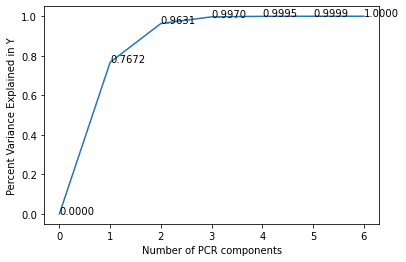

In [37]:
# 绘制主成分的累计贡献率(响应变量中解释的方差百分比)与组件数量的碎石图
comp = range(0, p+1)
# 主成分的累计贡献率(计算方差百分比)
summ = 0
W_sum = [0]
for i in range(p):
    summ += W_srt[i]
    W_sum.append(summ / p)
plt.plot(comp, W_sum)
plt.xlabel('Number of PCR components')
plt.ylabel('Percent Variance Explained in Y')
for i,j in zip(comp, W_sum):
    plt.text(i, j, '%.4f' % float(j))

**观察，寻找碎石图从陡峭逐渐变平坦前的变量，保留累计贡献率比重大的主成分**

In [59]:
c_pc = 0.8
cnt = True
thres = p * c_pc

while cnt:
    W_sum = 0
    W_summ = W_srt[0] 
    for i in range(p-1):
        k1 = i + 1 
        W_sum += W_srt[i]
        W_summ += W_srt[i+1]
        # print(i,W_sum,W_summ,thres)
        if (W_sum < thres) & (W_summ >= thres):
            cnt = False
            break
        elif i == p - 2:
            cnt = False
            k1 = i + 1
            break
k1 = k1 + 1
print('保留变量个数为: ', k1) 

保留变量个数为:  2


删除特征值接近于零的主成分

In [39]:
for i in range(p):
    if W_srt[i] < 1:
        k2 = i
        break
print('保留变量个数为: ', k2)   

保留变量个数为:  2


In [40]:
# 均方误差确定 k
mse = 0
for i in range(p):
    k3 = p
    mse += 1 / W_srt[i]
    print(5 * (i + 1), mse)
    if mse > 5 * (i + 1):
        k3 = i
        break
    elif i == p-1:
        k3 = p
        break
print('保留变量个数 <=', k3) 

5 0.21723182333231833
10 1.0680490976728454
15 5.9838567385536665
20 72.9709060400337
保留变量个数 <= 3


在变量选择上，我们主要还是参考特征值的贡献度，所以所以我们选择保留变量的个数为 2 个。

**Q3:对降维后的数据进行回归分析**

In [41]:
# 矩阵拆分
k = k1
list_var1 = W_idx[0:k] # 记录降序排序后的前 k 个主成分
list_var2 = W_idx[k:]
# list_var1 = [0,2] 
# list_var2 = [1,3]

Z_1 = Z[:,list_var1]
Z_2 = Z[:,list_var2]

W_diag_1 = np.diag(W_diag[list_var1,list_var1])
W_diag_2 = np.diag(W_diag[list_var2,list_var2])

# 按行进行拆分
V_1 = V[list_var1,:]
V_2 = V[list_var2,:]

# α的估计
# alpha_hat = np.linalg.inv(W_diag) @ Z.T @ Y_std
alpha1_hat = np.linalg.inv(W_diag_1) @ Z_1.T @ Y_std
print('系数:', alpha1_hat)

# 主成分估计
# beta_pc = np.dot(V_1.T,alpha1_hat)
# print(beta_pc)
# print(V_1.T @ V_1 @ beta_std[1:]) # 验证PPT 99页的性质1

系数: [0.44565109 0.11156928]


In [42]:
# 使用拆分后的数据用线性回归模型进行建模
X_pc = Z_1
model_pc = sm.OLS(Y_std, X_pc).fit()
model_pc.summary()

/Users/sunqiushi/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.929
Model:                            OLS   Adj. R-squared (uncentered):              0.919
Method:                 Least Squares   F-statistic:                              91.43
Date:                Tue, 20 Apr 2021   Prob (F-statistic):                    9.20e-09
Time:                        19:07:14   Log-Likelihood:                          20.625
No. Observations:                  16   AIC:                                     -37.25
Df Residuals:                      14   BIC:                                     -35.71
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4457      0.033     13.416      0.000       0.374       0.517
x2             0.1116      0.066      1.697      0.112      -0.029       0.253
==============================================================================
Omnibus:                        0.210   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.900   Jarque-Bera (JB):                0.371
Skew:                          -0.201   Prob(JB):                        0.831
Kurtosis:                       2.371   Cond. No.                         1.98
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**判断多重共线性 (k > 1 时才可能存在多重共线性问题)**

In [60]:
judge_col(X_pc, thres_vif=5, thres_kappa=10)

VIF方法判断结果(阈值为 5): 
设计矩阵 X 不存在多重共线性.

特征值判定法判断结果(阈值为 10): 
设计矩阵 X 不存在多重共线性，其中kappa值为：1.9790


In [61]:
# 创建pca模型
pca = PCA(n_components=2)

# 对模型进行训练
X_pc_ = X_std * 1.0
pca.fit(X_pc_)

# 返回降维后数据
X_pc_ = pca.transform(X_pc_)

# 使用返回后的数据用线性回归模型进行建模
model_pc_ = sm.OLS(Y_std, X_pc_).fit()
model_pc_.summary()

/Users/sunqiushi/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.929
Model:                            OLS   Adj. R-squared (uncentered):              0.919
Method:                 Least Squares   F-statistic:                              91.43
Date:                Tue, 20 Apr 2021   Prob (F-statistic):                    9.20e-09
Time:                        22:59:18   Log-Likelihood:                          20.625
No. Observations:                  16   AIC:                                     -37.25
Df Residuals:                      14   BIC:                                     -35.71
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.4457      0.033    -13.416      0.000      -0.517      -0.374
x2             0.1116      0.066      1.697      0.112      -0.029       0.253
==============================================================================
Omnibus:                        0.210   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.900   Jarque-Bera (JB):                0.371
Skew:                          -0.201   Prob(JB):                        0.831
Kurtosis:                       2.371   Cond. No.                         1.98
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

判断多重共线性

k 值大于 1 时才可能存在多重共线性问题

In [45]:
judge_col(X_pc_, thres_vif=5, thres_kappa=10)

VIF方法判断结果(阈值为 5): 
设计矩阵 X 不存在多重共线性.

特征值判定法判断结果(阈值为 10): 
设计矩阵 X 不存在多重共线性，其中kappa值为：1.9790


Remark

**碎石图** : 碎石图是显示降序的与分量或因子关联的特征值以及分量或因子的数量。用在主分量分析和因子分析中，以直观地评估哪些分量或因子占数据中变异性的大部分。 碎石图中的理想模式是一条陡曲线，接着是一段弯曲，然后是一条平坦或水平的线。保留陡曲线中在开始平坦线趋势的第一个点之前的那些分量或因子。我们使用碎石图来寻找贡献主成分的变量。

**End of Homework8**